# Factorización QR


Algoritmo de factorización QR

Para cada  $j$, calculamos una simple proyección  $$v_j = P_ja_j$$  donde $P_j$ es la proyección en el espacio ortogonal del span de $q_1,\ldots,q_{j-1}$.


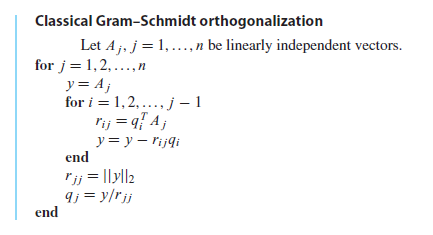

In [ ]:
import numpy as np

np.set_printoptions(suppress=True, precision=4)  # precision work

## Implementación del método QR básico

In [ ]:
def cgs(A):
    m, n = A.shape
    Q = np.zeros([m,n], dtype=np.float64)
    R = np.zeros([n,n], dtype=np.float64)
    for j in range(n):
        v = A[:,j]
        for i in range(j):
            R[i,j] = np.dot(Q[:,i], A[:,j])
            v = v - (R[i,j] * Q[:,i])
        R[j,j] = np.linalg.norm(v)
        Q[:, j] = v / R[j,j]
    return Q, R

In [ ]:
## creation of example matrix
n = 6
A = np.random.rand(n,n)

Q, R = cgs(A)

## comprobation 
## Con este c[odigo comprobamos si Q*R es igual a A

np.allclose(A, Q @ R)

True


El método de Gram-Schmidt, es inestable, pues para cada $j$ calcula una simple proyección $$v_j = P_ja_j$$ donde $P_j$ proyecta ene le espacio ortogonal del span de  $q_1,\ldots,q_{j-1}$.

si modificamos  Gram-Schmidt: para cada  $j$, calculamos $j-1$ proyectando $$P_j = P_{\perp q_{j-1}\cdots\perp q_{2}\perp q_{1}}$$

In [ ]:
def mgs(A):
    V = A.copy()
    m, n = A.shape
    Q = np.zeros([m,n], dtype=np.float64)
    R = np.zeros([n,n], dtype=np.float64)
    for i in range(n):
        R[i,i] = np.linalg.norm(V[:,i])
        Q[:,i] = V[:,i] / R[i,i]
        for j in range(i, n):
            R[i,j] = np.dot(Q[:,i],V[:,j])
            V[:,j] = V[:,j] - R[i,j]*Q[:,i]
    return Q, R

# Nota
Si $A_{n\times n}$, donde cada una de sus columnas son linealmente idependientes  entonces las columnas  de  $Q$ forman una base para $\mathbb{R}^n $. Además la matriz $Q$ es ortonormal, es decir $QQ^T=Q^TQ=I$.

## Pregunta
¿Qué podemos decir de las filas de la matriz de $Q$ si $A_{n\times m}$ con $n>m$? ¿ De los productos $Q^tQ$ y $QQ^T$?

# Existe alguna aplicación para QR. 

La factorización $QR$ tiene muchas aplicaciones, las más relevantes están en torno que puede ayudar a solucionar adecuadamente problemas de mínimos cuadrados, para introducir este concepto, trabajaremos con la interpolación de un polinomio de grado 7.

Sea los puntos $x_0=2.0$, $x_1=1.2$,...,$x_{10}=4.0$, puntos igualmente espaciados entre el intervalo $[2,4]$ y sea el conjunto $y_i=1+x_i+x_1^2+\cdots+x_i^{10}$ para $0\leq i\leq 10$. Obviamente el polinomio que que une a estos puntos es $P(x)=1+x+x^2+\cdots+x^{10}$. supongamos que no concemos el polinomio $P(x)$, y lo queremos encontrar, de esta forma podemos decir que $$P(x)=c_0+c_1x+\cdots+c_{10}x^{10},$$ de esta forma podemos plantear el sistemas de ecuaciones 

$$\begin{pmatrix}
1&x_0&x_0^2 &  & x^{10}_{0}\\
\vdots&\vdots & \vdots & & \vdots\\
1&x_{10}&x_{10}^2 &  & x^{10}_{10}
\end{pmatrix}\begin{pmatrix}c_0\\\vdots\\c_{10}\end{pmatrix}=\begin{pmatrix}y_0\\\vdots\\y_{10}\end{pmatrix}$$

In [ ]:
!pip install numpy
!pip install scipy 

In [ ]:

import numpy as np
import scipy.linalg as la

n=11
A = np.zeros([n,n], dtype=np.float64)
c = np.zeros([n,1], dtype=np.float64)
y = np.zeros([n,1], dtype=np.float64)

for j in range(n):
    xi=2.0+0.2*j
    A[j,:]=np.array([xi**i for i in range(n)])
y=np.sum(A,axis=1)    
print(A)
print(y)


[[1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
  1.60000000e+01 3.20000000e+01 6.40000000e+01 1.28000000e+02
  2.56000000e+02 5.12000000e+02 1.02400000e+03]
 [1.00000000e+00 2.20000000e+00 4.84000000e+00 1.06480000e+01
  2.34256000e+01 5.15363200e+01 1.13379904e+02 2.49435789e+02
  5.48758735e+02 1.20726922e+03 2.65599228e+03]
 [1.00000000e+00 2.40000000e+00 5.76000000e+00 1.38240000e+01
  3.31776000e+01 7.96262400e+01 1.91102976e+02 4.58647142e+02
  1.10075314e+03 2.64180754e+03 6.34033810e+03]
 [1.00000000e+00 2.60000000e+00 6.76000000e+00 1.75760000e+01
  4.56976000e+01 1.18813760e+02 3.08915776e+02 8.03181018e+02
  2.08827065e+03 5.42950368e+03 1.41167096e+04]
 [1.00000000e+00 2.80000000e+00 7.84000000e+00 2.19520000e+01
  6.14656000e+01 1.72103680e+02 4.81890304e+02 1.34929285e+03
  3.77801998e+03 1.05784560e+04 2.96196767e+04]
 [1.00000000e+00 3.00000000e+00 9.00000000e+00 2.70000000e+01
  8.10000000e+01 2.43000000e+02 7.29000000e+02 2.18700000e+03
  6.56100000e+03

In [ ]:
P, L, U = la.lu(A)
b = la.solve_triangular(L , P@y, lower=True)
c = la.solve_triangular(U , b, lower=False)
print(c)

[ 2.76220576e+13 -9.75165846e+13  1.54052241e+14 -1.43411981e+14
  8.71287819e+13 -3.60985005e+13  1.03295611e+13 -2.01588641e+12
  2.56796792e+11 -1.92824556e+10  6.48134011e+08]


In [ ]:
#Q, R = mgs(A)
Q, R = la.qr(A)
f = la.solve_triangular(R , Q.T@y, lower=False)
print(f)

[1.00105674 0.99623443 1.00600109 0.99436758 1.00344772 0.99856181
 1.00041405 0.99991876 1.0000104  0.99999922 1.00000003]


In [ ]:



b = la.solve_triangular(L , P@y, lower=True)
c = la.solve_triangular(U , b, lower=False)
print(c)

#Q, R = la.qr(A)
#Q, R = cgs(A)
Q, R = mgs(A)

f = la.solve_triangular(R , Q.T@y, lower=False)
print(f)

#np.allclose(A, P @ L@ U)

# Householder reflections 

## Teorema 
Asumimos que $w$ y $x$ tienen la misma longitud euclidiana entonces $w-x$ y $w+x$ son perpendiculares.

### Matriz de proyección 
Una matriz se llama de proyección si $A^2=A$
$$P=\frac{vv^t}{v^tv}$$

Propiedades de $P$
    * $P$ es simétrico 
    * $Pv=v$
    * $P^2=P$
Dado un vector $u$, $Pu$ es la proyección de $u$ en $v$

Si nosotros substraemos 2 veces $Px$ desde $x$, podremos obtener $w$. Para verificar esto 

sea $$H=I-2P$$
$$Hx=w-v-\frac{2vv^T}{v^Tv}x=w$$

<img src="imagenes\hause.png" alt="term-document matrix" style="width: 30%"/>

La matriz $H$ es llamado el reflector de  Householder

    * $H$ es simétrico
    * $H^TH=HH=I$, e.d ortogonal
    
## Reflector de Householder

Sea $x$ y $w$ dos vectores de la misma longitud $||x||_2=||w||_2$ y definimos $v=w-x$. entonces $$H=I-2\frac{vv^T}{v^Tv}$$ es una matriz simetrica ortogonal y $Hx=w$

## Ejercicio 

Sea $x=[3,4]$ y $w=[5,0]$, encontrar el reflector de Hauseholder que satisface $$Hx=w$$


### Algortimo de Hoseholder 


<img src="imagenes\hase1.png" alt="term-document matrix" style="width: 50%"/>

<img src="imagenes\hase2.png" alt="term-document matrix" style="width: 50%"/>

<img src="imagenes\hase3.png" alt="term-document matrix" style="width: 50%"/>


## algoritmo

In [ ]:
def householder_lots(A):
    m, n = A.shape
    R = np.copy(A)
    V = []
    Fs = []
    for k in range(n):
        v = np.copy(R[k:,k])
        v = np.reshape(v, (n-k, 1))
        v[0] += np.sign(v[0]) * np.linalg.norm(v)
        v /= np.linalg.norm(v)
        R[k:,k:] = R[k:,k:] - 2*np.matmul(v, np.matmul(v.T, R[k:,k:]))
        V.append(v)
        F = np.eye(n-k) - 2 * np.matmul(v, v.T)/np.matmul(v.T, v)
        Fs.append(F)
    return R, V, Fs

\begin{array}{ l | l | c }
\hline
Gram-Schmidt & Triangular\, Orthogonalization & A R_1 R_2 \cdots R_n = Q  \\
Householder  & Orthogonal\, Triangularization & Q_n \cdots Q_2 Q_1 A = R  \\
\hline
\end{array}

## Ejemplo

Tomado de Trefethen and Bau

We want to construct a square matrix A with random singular vectors and widely varying singular values spaced by factors of 2 between $2^{-1}$ and $2^{-(n+1)}$

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

In [ ]:
n = 100
U, X = np.linalg.qr(np.random.randn(n,n))   # set U to a random orthogonal matrix
V, X = np.linalg.qr(np.random.randn(n,n))   # set V to a random orthogonal matrix
S = np.diag(np.power(2,np.arange(-1,-(n+1),-1), dtype=float))  # Set S to a diagonal matrix w/ exp 
                                                              # values between 2^-1 and 2^-(n+1)

In [ ]:
A = np.matmul(U,np.matmul(S,V))

In [ ]:
QC, RC = cgs(A)
QM, RM = mgs(A)

In [ ]:
plt.figure(figsize=(10,10))
plt.semilogy(np.diag(S), 'r.', basey=2, label="True Singular Values")
plt.semilogy(np.diag(RM), 'go', basey=2, label="Modified Gram-Shmidt")
plt.semilogy(np.diag(RC), 'bx', basey=2, label="Classic Gram-Shmidt")
plt.legend()
rcParams.update({'font.size': 18})

In [ ]:
type(A[0,0]), type(RC[0,0]), type(S[0,0])

In [ ]:
eps = np.finfo(np.float64).eps; eps

In [ ]:
np.log2(eps), np.log2(np.sqrt(eps))

## perdidad de ortogonalidad

Tomado de Trefethen

In [ ]:
A = np.array([[0.70000, 0.70711], [0.70001, 0.70711]])
Q1, R1 = mgs(A) ## Gram smith 
R2, V, F = householder_lots(A)  #Hauseholder
Q2T = np.matmul(block_diag(np.eye(1), F[1]), F[0])

In [ ]:
Q3, R3 = np.linalg.qr(A)

In [ ]:
np.matmul(Q1, R1)
np.matmul(Q2T.T, R2)
np.matmul(Q3, R3)

In [ ]:
np.linalg.norm(np.matmul(Q1.T, Q1) - np.eye(2))  # Modified Gram-Schmidt

In [ ]:
np.linalg.norm(np.matmul(Q2T.T, Q2T) - np.eye(2))  # Our implementation of Householder

In [ ]:
np.linalg.norm(np.matmul(Q3.T, Q3) - np.eye(2))  # Numpy (which uses Householder)

NameError: name 'Q3' is not defined